<a href="https://colab.research.google.com/github/angeliki-tzanou/datasci_6_anova/blob/main/HHA_507_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading packages:

In [ ]:
import pandas as pd

In [ ]:
import scipy.stats as stats

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

In [ ]:
import matplotlib.pyplot as plt

### Data Preparation:

- Creating a subset with only variables of interest:


> Importing dataset from website:



In [ ]:
# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets


/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)




> Displaying Dataframe:



In [ ]:
df_diab = pd.DataFrame(X)
df_diab

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


### Macrolevel Check Shapiro analysis:

Variables of Interest:

- dv = time in hospital
- iv1 = number of lab procedures
- iv2 = number of medications

In [33]:
df_diab.head(10)

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
5,Caucasian,Male,[50-60),NaN,2,1,2,3,NaN,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
6,Caucasian,Male,[60-70),NaN,3,1,2,4,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
7,Caucasian,Male,[70-80),NaN,1,1,7,5,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
8,Caucasian,Female,[80-90),NaN,2,1,4,13,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
9,Caucasian,Female,[90-100),NaN,3,3,4,12,NaN,InternalMedicine,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [34]:
numerical_columns = df_diab.select_dtypes(include='number')
print(numerical_columns)

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1                       1                         1                    7   
2                       1                         1                    7   
3                       1                         1                    7   
4                       1                         1                    7   
...                   ...                       ...                  ...   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0     

In [ ]:
df_diab.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [29]:
print('Main DV: ', stats.shapiro(df_diab['time_in_hospital']))

Main DV:  ShapiroResult(statistic=0.8869192600250244, pvalue=0.0)


Visualization:

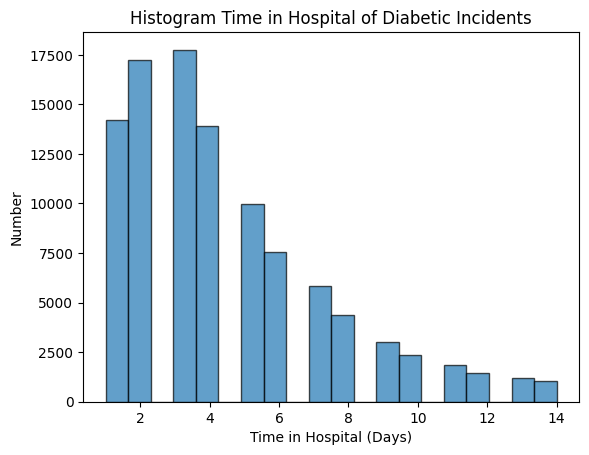

In [23]:
plt.hist(df_diab['time_in_hospital'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram Time in Hospital of Diabetic Incidents')
plt.xlabel('Time in Hospital (Days)')
plt.ylabel('Number')
plt.show()

Grouping our data by our independent variables:

In [51]:
groups = df_diab.groupby(['num_lab_procedures', 'num_medications'])

for (lab_procedures, medications), group_df in groups:
    if len(group_df) >= 3:
        _, p_value = shapiro(group_df['time_in_hospital'])

        print(f"Group (Lab Procedures: {lab_procedures}, Medications: {medications}):")
        print(f"P-value from Shapiro-Wilk Test: {p_value}")
    else:
        print(f"Group (Lab Procedures: {lab_procedures}, Medications: {medications}): Skipped (Sample size < 3)")

Group (Lab Procedures: 1, Medications: 1):
P-value from Shapiro-Wilk Test: 0.0017220227746292949
Group (Lab Procedures: 1, Medications: 10):
P-value from Shapiro-Wilk Test: 1.9086530519594157e-14
Group (Lab Procedures: 1, Medications: 11):
P-value from Shapiro-Wilk Test: 2.415498414063869e-16
Group (Lab Procedures: 1, Medications: 12):
P-value from Shapiro-Wilk Test: 1.6383600315785928e-15
Group (Lab Procedures: 1, Medications: 13):
P-value from Shapiro-Wilk Test: 9.428989715542396e-16
Group (Lab Procedures: 1, Medications: 14):
P-value from Shapiro-Wilk Test: 5.834645917454639e-13
Group (Lab Procedures: 1, Medications: 15):
P-value from Shapiro-Wilk Test: 1.4201873624862266e-14
Group (Lab Procedures: 1, Medications: 16):
P-value from Shapiro-Wilk Test: 2.7817130109769606e-12
Group (Lab Procedures: 1, Medications: 17):
P-value from Shapiro-Wilk Test: 1.5644374684598006e-09
Group (Lab Procedures: 1, Medications: 18):
P-value from Shapiro-Wilk Test: 1.792752257756547e-08
Group (Lab Proce

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Streaming output truncated to the last 5000 lines.
P-value from Shapiro-Wilk Test: 0.7316085696220398
Group (Lab Procedures: 4, Medications: 25):
P-value from Shapiro-Wilk Test: 0.4211485683917999
Group (Lab Procedures: 4, Medications: 26): Skipped (Sample size < 3)
Group (Lab Procedures: 4, Medications: 27):
P-value from Shapiro-Wilk Test: 1.0
Group (Lab Procedures: 4, Medications: 28):
P-value from Shapiro-Wilk Test: 1.0
Group (Lab Procedures: 4, Medications: 29): Skipped (Sample size < 3)
Group (Lab Procedures: 4, Medications: 3):
P-value from Shapiro-Wilk Test: 0.02189340442419052
Group (Lab Procedures: 4, Medications: 30): Skipped (Sample size < 3)
Group (Lab Procedures: 4, Medications: 32): Skipped (Sample size < 3)
Group (Lab Procedures: 4, Medications: 37): Skipped (Sample size < 3)
Group (Lab Procedures: 4, Medications: 4):
P-value from Shapiro-Wilk Test: 0.00417440477758646
Group (Lab Procedures: 4, Medications: 5):
P-value from Shapiro-Wilk Test: 2.0729139578179456e-05
Group



> Printing now the values with the skipped groups that were displayed above:



In [52]:
groups = df_diab.groupby(['num_lab_procedures', 'num_medications'])

for (num_lab_procedures_status, num_medications_status), group_df in groups:
  if len(group_df) >= 3:
    _, p_value = stats.shapiro(group_df['time_in_hospital'])

    print(f"Group ({num_lab_procedures_status}, {num_medications_status}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}")

Group (1, 1):
P-value from Shapiro-Wilk Test: 0.0017220227746292949
Group (1, 10):
P-value from Shapiro-Wilk Test: 1.9086530519594157e-14
Group (1, 11):
P-value from Shapiro-Wilk Test: 2.415498414063869e-16
Group (1, 12):
P-value from Shapiro-Wilk Test: 1.6383600315785928e-15
Group (1, 13):
P-value from Shapiro-Wilk Test: 9.428989715542396e-16
Group (1, 14):
P-value from Shapiro-Wilk Test: 5.834645917454639e-13
Group (1, 15):
P-value from Shapiro-Wilk Test: 1.4201873624862266e-14
Group (1, 16):
P-value from Shapiro-Wilk Test: 2.7817130109769606e-12
Group (1, 17):
P-value from Shapiro-Wilk Test: 1.5644374684598006e-09
Group (1, 18):
P-value from Shapiro-Wilk Test: 1.792752257756547e-08
Group (1, 19):
P-value from Shapiro-Wilk Test: 9.439019343915334e-09
Group (1, 2):
P-value from Shapiro-Wilk Test: 0.00033834236091934144
Group (1, 20):
P-value from Shapiro-Wilk Test: 1.5870890379687808e-08
Group (1, 21):
P-value from Shapiro-Wilk Test: 4.812238429963145e-08
Group (1, 22):
P-value from S

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Streaming output truncated to the last 5000 lines.
Group (28, 10):
P-value from Shapiro-Wilk Test: 8.88210615812568e-06
Group (28, 11):
P-value from Shapiro-Wilk Test: 1.8962725789606338e-06
Group (28, 12):
P-value from Shapiro-Wilk Test: 5.645551581778818e-08
Group (28, 13):
P-value from Shapiro-Wilk Test: 7.12859415941125e-09
Group (28, 14):
P-value from Shapiro-Wilk Test: 2.646324719535187e-05
Group (28, 15):
P-value from Shapiro-Wilk Test: 5.365442845572943e-08
Group (28, 16):
P-value from Shapiro-Wilk Test: 4.925750918260974e-09
Group (28, 17):
P-value from Shapiro-Wilk Test: 0.0005190767114982009
Group (28, 18):
P-value from Shapiro-Wilk Test: 1.2754203453368973e-05
Group (28, 19):
P-value from Shapiro-Wilk Test: 9.494423284195364e-05
Group (28, 2):
P-value from Shapiro-Wilk Test: 0.0018938843859359622
Group (28, 20):
P-value from Shapiro-Wilk Test: 2.6174389859079383e-05
Group (28, 21):
P-value from Shapiro-Wilk Test: 9.026264888234437e-05
Group (28, 22):
P-value from Shapiro-Wi

In this case above we can see that all the groups that are created,there are plenty that are normal due to the p-value being greater than 0.05 whereas other group combinations are significantly smaller than the 0.05 benchmark declaring them not normal.

###Levene's test

In [58]:
from scipy.stats import levene

groups_data = [group_df_diab['time_in_hospital'] for (_, _), group_df_diab in groups]

_, p_value = stats.levene(*groups_data)
print(f"Levene's Test p-value: {p_value}")



Levene's Test p-value: 1.8549402720278174e-203


Here we can conclude that since the Levene's test p-value is significantly smaller than 0.05 then the variances are not equal amongst the groups in the variables of interst selected.

In [ ]:
model = ols('time_in_hospital ~ C(num_lab_procedures) * C(num_medications)', data=df_diab).fit()